# 📚 SMS Spam Classifier using Machine Learning

**Subject:** Natural Language Processing (NLP) – Text Classification  
**Authored by:** Ihsan Ul Haq Afridi  
**Contact:** [LinkedIn Profile](https://www.linkedin.com/in/ihsan-ul-haq-7233a2330/)

---

This project demonstrates the application of machine learning algorithms to classify SMS messages as either **Spam** or **Ham** (non-spam) using models such as:
- Naive Bayes  
- Logistic Regression  
- Support Vector Machine (SVM)  
- Random Forest  

Performance is evaluated using accuracy, precision, recall, and F1-score metrics, and visualized with plots.


In [1]:
# Importing necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import itertools  # For efficient looping and combinations (e.g., for plotting confusion matrix)

# Importing modules from scikit-learn for model building and evaluation
from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer  # To convert text data into TF-IDF feature vectors

# Importing classification algorithms
from sklearn.linear_model import PassiveAggressiveClassifier  # A linear classifier suitable for online learning
from sklearn.linear_model import LogisticRegression  # A widely used linear model for classification tasks
from sklearn.svm import SVC  # Support Vector Classifier for high-dimensional spaces
from sklearn.ensemble import RandomForestClassifier  # An ensemble classifier using multiple decision trees

# Importing metrics to evaluate the performance of models
from sklearn.metrics import accuracy_score, confusion_matrix  # For accuracy and confusion matrix evaluation


In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')  # Reading the CSV file 'spam.csv' using pandas with 'latin1' encoding to handle special characters



In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#df.head()

In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
df.shape

(5572, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
pd.set_option('display.max_columns', None)  # Ensures all columns are displayed when printing a DataFrame
pd.set_option('display.expand_frame_repr', True)  # Allows DataFrame to be printed across multiple lines (prevents column wrapping)
pd.set_option('max_colwidth', None)  # Displays full content in each cell without truncating text




In [10]:
df.head(10)  # Displays the first 10 rows of the DataFrame to preview the dataset


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030,NaN,NaN,NaN


In [11]:
df = df.rename(columns={'v1': 'category', 'v2': 'text'})  # Renaming columns: 'v1' to 'category' and 'v2' to 'text' for better readability
df  # Displaying the updated DataFrame with renamed columns


,category,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,NaN,NaN,NaN


In [12]:
newdf = df[['text', 'category']]  # Creating a new DataFrame with only the 'text' and 'category' columns
newdf  # Displaying the new DataFrame containing the selected columns


,text,category
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives around here though",ham
...,...,...
5567,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other suggestions?",ham
5570,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,ham


In [13]:
print(newdf['text'].isnull().sum(axis= 0))

0


In [14]:
print(newdf.isnull().sum(axis=0))

text        0
category    0
dtype: int64


In [15]:
print(newdf['category'].value_counts())

category
ham     4825
spam     747
Name: count, dtype: int64


In [16]:
import matplotlib.pyplot as plt

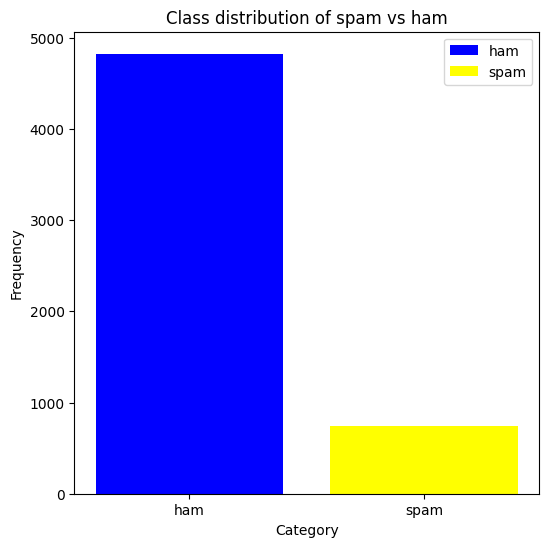

In [17]:
# Getting the count of each class (ham and spam) in the 'category' column
class_distribution = newdf['category'].value_counts()

# Creating a figure and axis for plotting
fig, ax = plt.subplots(figsize=(6,6))  # Setting the size of the plot to 6x6 inches

# Plotting the bar for the 'ham' category
ax.bar(class_distribution.index[0], class_distribution.values[0], color='blue', label='ham')

# Plotting the bar for the 'spam' category
ax.bar(class_distribution.index[1], class_distribution.values[1], color='yellow', label='spam')

# Setting the title and axis labels for the plot
ax.set_title('Class distribution of spam vs ham')  # Title of the plot
ax.set_xlabel('Category')  # Label for the x-axis
ax.set_ylabel('Frequency')  # Label for the y-axis

# Adding a legend to the plot
ax.legend(loc='upper right')  # Displaying the legend in the upper-right corner

# Displaying the final plot
plt.show()


In [18]:
newdf['text'].head(10)

0                                                     Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1                                                                                                                                       Ok lar... Joking wif u oni...
2         Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3                                                                                                                   U dun say so early hor... U c already then say...
4                                                                                                       Nah I don't think he goes to usf, he lives around here though
5                FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
6   

In [19]:
''.join(newdf['text'].head(10))

"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...Ok lar... Joking wif u oni...Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18'sU dun say so early hor... U c already then say...Nah I don't think he goes to usf, he lives around here thoughFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcvEven my brother is not like to speak with me. They treat me like aids patent.As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends CallertuneWINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.Had your mobile 11 months or more? U R entitled to 

In [20]:
df.head(2)

,category,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [21]:
' '.join(newdf['text'].head(2))

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni...'

In [22]:
from wordcloud import WordCloud


ModuleNotFoundError: No module named 'wordcloud'

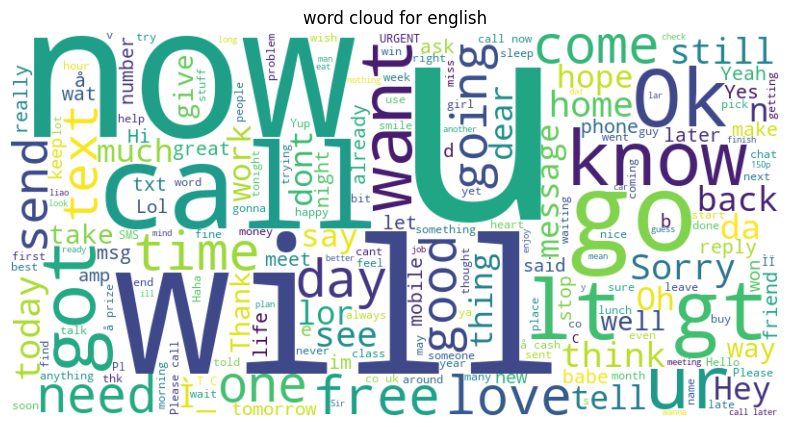

In [ ]:
# Combining all text messages into one large string (corpus) for word cloud generation
text_corpus = ' '.join(newdf['text'])

# Creating a WordCloud object with specified width, height, background color, and random state for consistency
wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(text_corpus)

# Setting the figure size for the plot
plt.figure(figsize=(10,5))  # Width = 10 inches, Height = 5 inches

# Displaying the generated word cloud image
plt.imshow(wordcloud, interpolation='bilinear')  # 'bilinear' smoothing gives a cleaner image

# Hiding the axes
plt.axis('off')

# Adding a title to the word cloud
plt.title('Word Cloud for English')

# Displaying the plot
plt.show()


In [ ]:
newdf.head(10)

,text,category
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives around here though",ham
5,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",spam
6,Even my brother is not like to speak with me. They treat me like aids patent.,ham
7,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,ham
8,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.,spam
9,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030,spam


pip install nltk
import nltk
nltk.download('stopwords')


In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
len(stop)


198

In [ ]:
import re  # Importing the 're' module for regular expressions
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.feature_extraction.text import CountVectorizer  # To convert text into a matrix of token counts

# Function to clean and preprocess the text
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase

    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove all characters except letters, digits, and whitespace
    text = text.split(" ")  # Split the text into individual words

    text = [x for x in text if x not in stop]  # Remove stop words (assumes 'stop' is a predefined list)
    return " ".join(text)  # Join the cleaned words back into a single string

# Apply the preprocessing function to the 'text' column and store the result in a new column 'Cleaned_Text'
newdf['Cleaned_Text'] = newdf['text'].apply(preprocess_text)

# Display the original and cleaned text for the first 6 rows
print(newdf[['text', 'Cleaned_Text']].head(6))


                                                                                                                                                          text  \
0                                              Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...   
1                                                                                                                                Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's   
3                                                                                                            U dun say so early hor... U c already then say...   
4                                                                                                Nah I don't think he goes to usf, he lives around here though   
5         FreeMsg Hey there 

C:\Users\ihsan\AppData\Local\Temp\ipykernel_4776\1205614414.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Cleaned_Text'] = newdf['text'].apply(preprocess_text)


In [ ]:
print(newdf[['Cleaned_Text']].head(2))

                                                                         Cleaned_Text
0  go jurong point crazy available bugis n great world la e buffet cine got amore wat
1                                                             ok lar joking wif u oni


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


In [ ]:
# Split the data into training and testing sets
X = newdf['Cleaned_Text']
y = newdf['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 

In [ ]:
# Vectorize the text data with unigrams, bigrams, and trigrams
vectorizer = CountVectorizer(ngram_range=(1, 3))  # Extract unigrams, 
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

print(X_train_vectorized.shape)
print(X_test_vectorized.shape)

(4457, 60394)
(1115, 60394)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Initialize and train the classifier
classifier = MultinomialNB() 
classifier.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the model
# Evaluate the model
report=classification_report(y_test, y_pred)

print(report)
print("############################################################\n")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.88      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

############################################################

[[962   3]
 [ 18 132]]


In [ ]:
# Calculate metrics
report = classification_report(y_test, y_pred, output_dict=True)
print(report)
print("\n************************************************")
accuracy = accuracy_score(y_test, y_pred)

{'ham': {'precision': 0.9816326530612245, 'recall': 0.9968911917098445, 'f1-score': 0.9892030848329049, 'support': 965.0}, 'spam': {'precision': 0.9777777777777777, 'recall': 0.88, 'f1-score': 0.9263157894736842, 'support': 150.0}, 'accuracy': 0.9811659192825112, 'macro avg': {'precision': 0.9797052154195012, 'recall': 0.9384455958549223, 'f1-score': 0.9577594371532945, 'support': 1115.0}, 'weighted avg': {'precision': 0.9811140599737654, 'recall': 0.9811659192825112, 'f1-score': 0.9807429105693327, 'support': 1115.0}}

************************************************


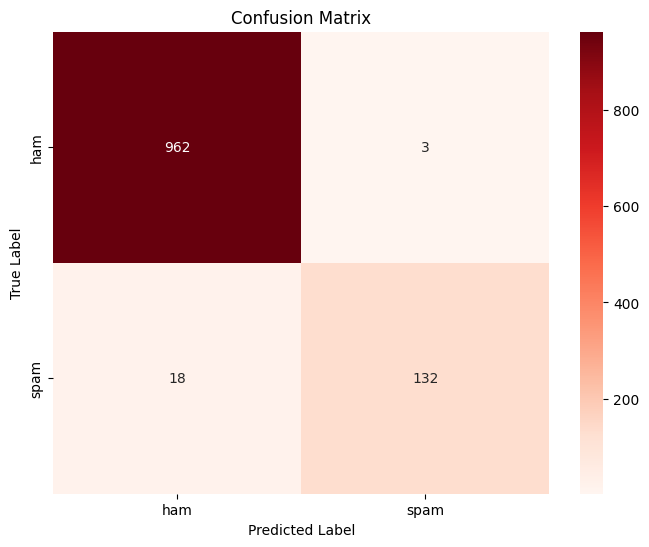

In [ ]:
# Generate the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

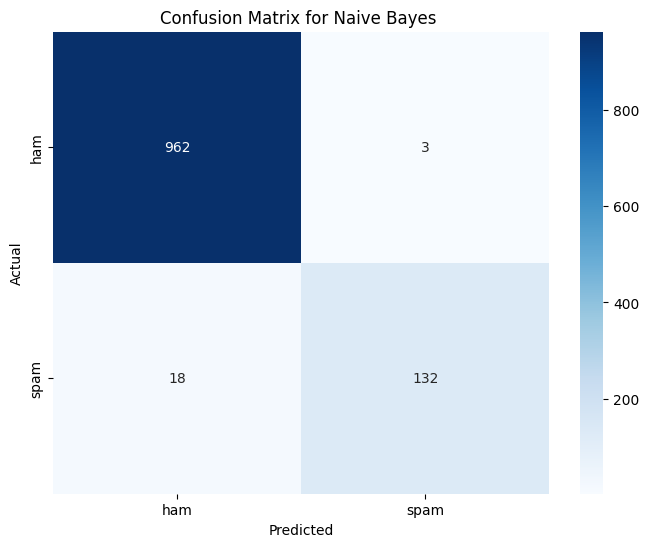


Naive Bayes  Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.88      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



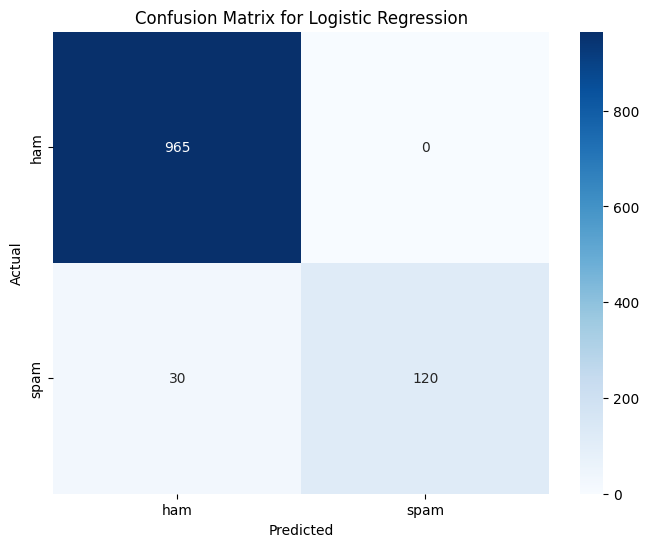


Logistic Regression Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       1.00      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



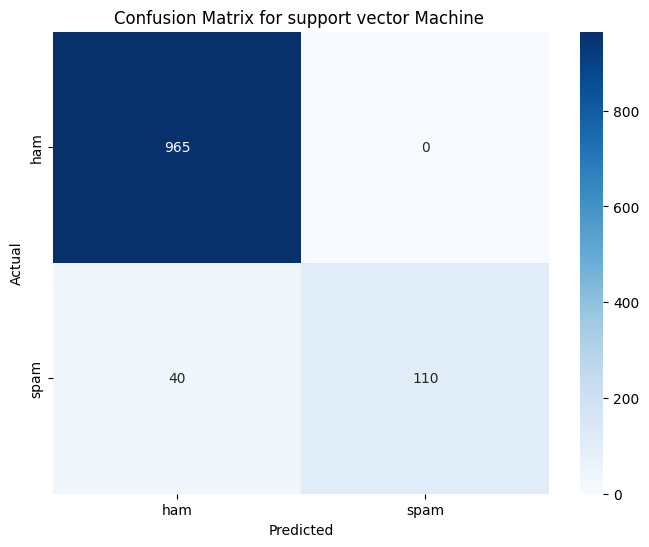


support vector Machine  Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.73      0.85       150

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.96      0.96      1115



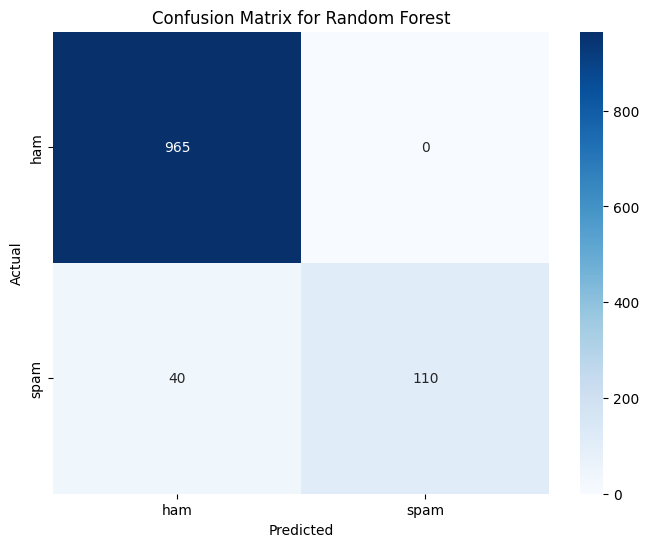


Random Forest Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.73      0.85       150

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.96      0.96      1115

dictionary  {'Naive Bayes ': {'Precision': 0.9777777777777777, 'Recall': 0.88, 'F1 Score': 0.9263157894736842, 'Accuracy': 0.9811659192825112}, 'Logistic Regression': {'Precision': 1.0, 'Recall': 0.8, 'F1 Score': 0.8888888888888888, 'Accuracy': 0.9730941704035875}, 'support vector Machine ': {'Precision': 1.0, 'Recall': 0.7333333333333333, 'F1 Score': 0.8461538461538461, 'Accuracy': 0.9641255605381166}, 'Random Forest': {'Precision': 1.0, 'Recall': 0.7333333333333333, 'F1 Score': 0.8461538461538461, 'Accuracy': 0.9641255605381166}}


In [ ]:
# classifiers to evalute 

classifiers = {
    'Naive Bayes ': MultinomialNB(),
    'Logistic Regression' : LogisticRegression(),
    'support vector Machine ': SVC(probability=True),
    'Random Forest' : RandomForestClassifier()
}

# store metrics for plotting
all_metrics = {}

for name , classifier in classifiers.items():
    # Initialize and train the classifier
    classifier.fit(X_train_vectorized, y_train)

    # make predictions
    y_pred = classifier.predict(X_test_vectorized)

    # calculate metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test , y_pred)

    # Prepare data for the bar chart
    metrics = {
        'Precision': report['spam']['precision'],
        'Recall': report['spam']['recall'],
        'F1 Score': report['spam']['f1-score'],
        'Accuracy': accuracy
    }

   # Store metrics for each classifier
    all_metrics[name] = metrics

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=['ham', 'spam'])

    # Create heatmap for confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    # Print the classification report for each classifier
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

print("dictionary ",all_metrics)



    

In [ ]:
 # Prepare data for grouped bar chart
metrics_df = pd.DataFrame(all_metrics)
#metrics_df = metrics_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']]  # Ensure the correct order
metrics_df = metrics_df.T
metrics_df 

,Precision,Recall,F1 Score,Accuracy
Naive Bayes,0.977778,0.880000,0.926316,0.981166
Logistic Regression,1.000000,0.800000,0.888889,0.973094
support vector Machine,1.000000,0.733333,0.846154,0.964126
Random Forest,1.000000,0.733333,0.846154,0.964126


In [ ]:
for i in metrics_df:
    print(i)

Precision
Recall
F1 Score
Accuracy


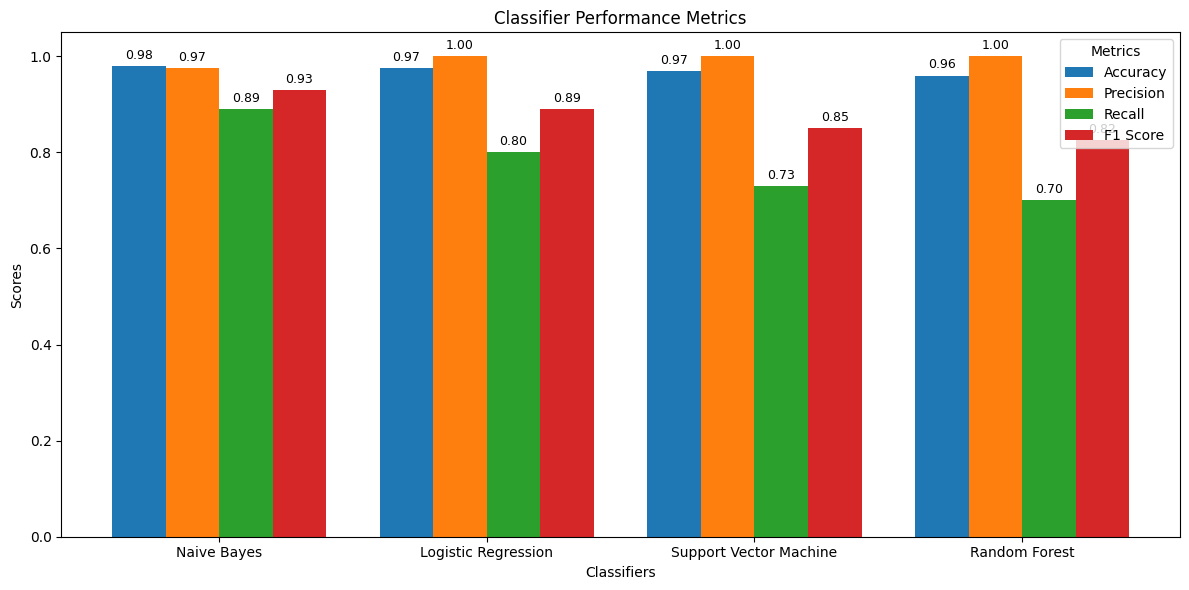

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
classifiers = ['Naive Bayes', 'Logistic Regression', 'Support Vector Machine', 'Random Forest']
accuracy = [0.98, 0.975, 0.97, 0.96]
precision = [0.975, 1.0, 1.0, 1.0]
recall = [0.89, 0.8, 0.73, 0.7]
f1_score = [0.93, 0.89, 0.85, 0.825]

metrics = [accuracy, precision, recall, f1_score]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

x = np.arange(len(classifiers))  # label locations
width = 0.2  # width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

for i in range(len(metrics)):
    bars = ax.bar(x + i * width, metrics[i], width, label=metric_names[i], color=colors[i])
    # Annotate top values
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

# Formatting
ax.set_ylabel('Scores')
ax.set_xlabel('Classifiers')
ax.set_title('Classifier Performance Metrics')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(classifiers)
ax.set_ylim(0, 1.05)
ax.legend(title='Metrics')

plt.tight_layout()
plt.show()


In [ ]:
 # Prepare data for grouped bar chart
metrics_df = pd.DataFrame(all_metrics)
#metrics_df = metrics_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']]  # Ensure the correct order
metrics_df = metrics_df.T
metrics_df 

,Precision,Recall,F1 Score,Accuracy
Naive Bayes,0.977778,0.880000,0.926316,0.981166
Logistic Regression,1.000000,0.800000,0.888889,0.973094
support vector Machine,1.000000,0.733333,0.846154,0.964126
Random Forest,1.000000,0.733333,0.846154,0.964126
